In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random


### 1. Построить граф метро большого города (агломерации).

In [117]:
# Загрузили json файл со схемой метро Санкт-Петербурга - название станций, их координаты, а также удобный перебор по линиям метро для создания ребер
# https://github.com/jarosluv/russian_infrastructure/blob/master/saint_petersburg/metro_stations.json

import json

all_stations = {"station": []}

with open("./stations.json", "r") as f:
    metro_stations = json.load(f)


for line in metro_stations:
    for each_station in line["stations"]:
        all_stations["station"].append(each_station)

all_stations

{'station': [{'name': 'Девяткино', 'latlon': [60.050251, 30.442809]},
  {'name': 'Гражданский проспект', 'latlon': [60.034915, 30.418276]},
  {'name': 'Академическая', 'latlon': [60.012719, 30.396133]},
  {'name': 'Политехническая', 'latlon': [60.008815, 30.370908]},
  {'name': 'Площадь Мужества', 'latlon': [59.999615, 30.366497]},
  {'name': 'Лесная', 'latlon': [59.984769, 30.344354]},
  {'name': 'Выборгская', 'latlon': [59.971024, 30.347345]},
  {'name': 'Площадь Ленина', 'latlon': [59.955723, 30.356014]},
  {'name': 'Чернышевская', 'latlon': [59.944436, 30.359975]},
  {'name': 'Площадь Восстания', 'latlon': [59.931517, 30.360559]},
  {'name': 'Владимирская', 'latlon': [59.927455, 30.348225]},
  {'name': 'Пушкинская', 'latlon': [59.920614, 30.329864]},
  {'name': 'Технологический институт – 1', 'latlon': [59.916342, 30.318545]},
  {'name': 'Балтийская', 'latlon': [59.907135, 30.299519]},
  {'name': 'Нарвская', 'latlon': [59.901111, 30.275004]},
  {'name': 'Кировский завод', 'latlon':

In [118]:
len(all_stations["station"])

# Добавляем ребра
metro_edges = []

for line in metro_stations:
    metro_edges
    for i in range(len(line["stations"]) - 1):
        metro_edges.append([line["stations"][i]["name"], line["stations"][i+1]["name"]])

In [119]:
# Добавляем пересадки
exchanges = [["Невский проспект", "Гостиный двор"], ["Площадь Восстания", "Маяковская"],
             ["Достоевская", "Владимирская"], ["Площадь Александра Невского – 1", "Площадь Александра Невского"],
             ['Спасская', 'Садовая'], ['Сенная площадь', 'Садовая'], ['Сенная площадь', 'Садовая'], ["Звенигородская", "Пушкинская"],
             ["Технологический институт – 1", "Технологический институт – 2"]]

metro_edges.extend(exchanges)

In [120]:
# from scipy.spatial.distance import cdist

# coordinates = [i["latlon"] for i in all_stations["station"]]
# print(coordinates)
# # # Соединяем пересадки по самому близкому расстоянию

# c_distances = cdist(coordinates, [all_stations["station"][0]["latlon"]], "euclidean")
# # # return int(algo_data_blitz_1.iloc[c_distances.argmin()]["move_time"]
# print(c_distances[0])
# print(coordinates[c_distances.argmin()])

### 2. Взвесить ребра графа в соответствии с временем прохождения поездов между станциями.
### 3. Визуализировать граф метро, пометив его вершины.

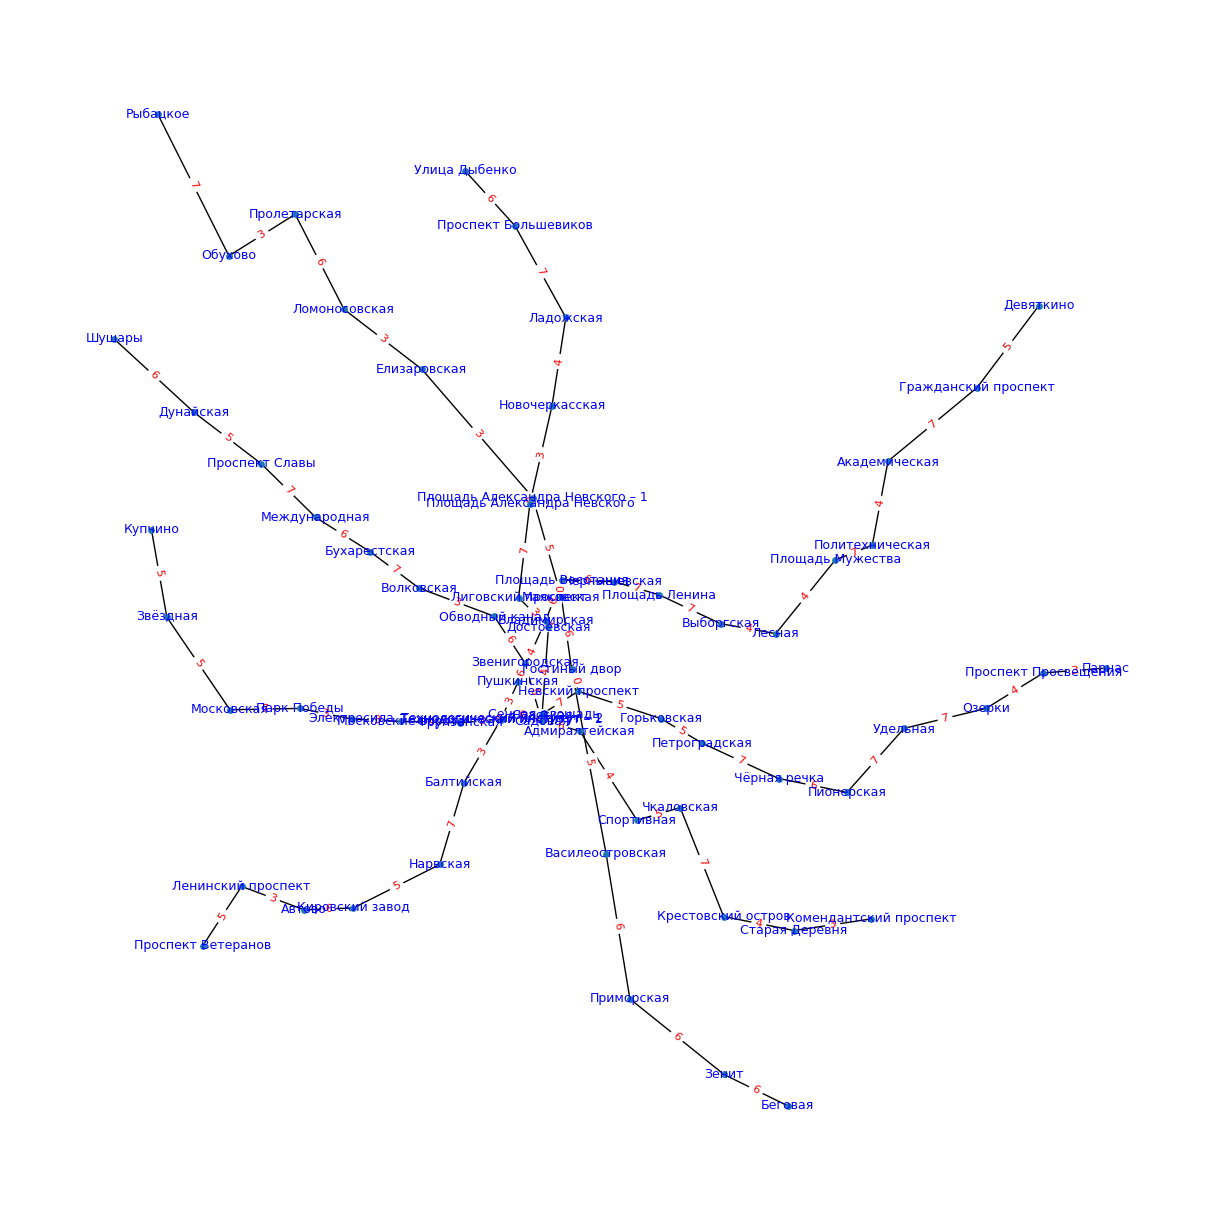

Graph with 72 nodes and 75 edges


In [124]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем пустой граф
metro_graph = nx.Graph()

# Добавляем вершины графа
for station in all_stations["station"]:
    # print(station["name"])
    metro_graph.add_node(station["name"], pos=station["latlon"])

# Добавляем ребра и веса
metro_graph.add_edges_from(metro_edges)

for u, v in metro_graph.edges():
    # от 3 до 7 мин
    metro_graph[u][v]['weight'] = random.randint(3, 7)
    # Пересадки имеют вес 0
    if [u, v] in exchanges:
        metro_graph[u][v]['weight'] = 0
    # print(metro_graph[u][v]['weight'])

edge_labels = nx.get_edge_attributes(metro_graph, "weight")
# print(edge_labels)
# Рисуем граф
plt.figure(figsize=(12, 12))


pos = nx.get_node_attributes(metro_graph, 'pos')

nx.draw(metro_graph, pos, with_labels=True, node_size=15, font_weight="light", font_color="blue", font_size=9)
nx.draw_networkx_edge_labels(metro_graph, pos=pos, edge_labels=edge_labels, font_color="red", font_size=8)

plt.show()

print(metro_graph)

### 4. Разместить на станциях метро минимальное количество точек общепита таким образом, чтобы до клиента, находящегося на любой станции метро, продукты были доставлены курьерской службой не более чем за 25 мин.

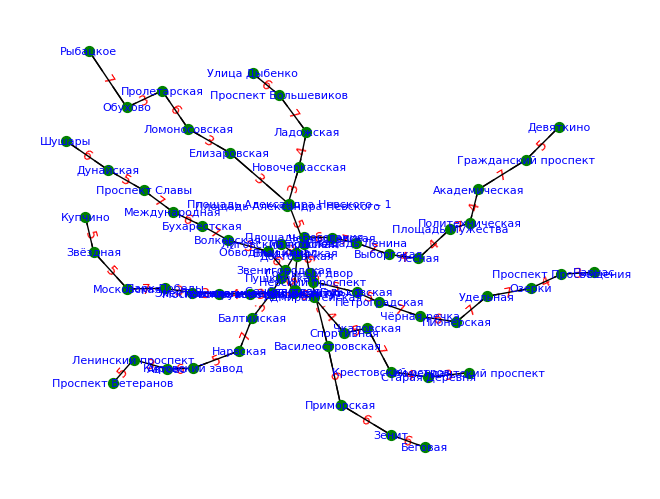

72
Graph with 72 nodes and 71 edges
The sum of weights in the minimum spanning tree is 328


In [128]:
# Вычисляем минимальное остовное дерево
point_graph=nx.minimum_spanning_tree(metro_graph)

nx.draw(point_graph, pos, with_labels=True, node_size=15, font_weight="light", font_color="blue", font_size=8)
nx.draw_networkx_edge_labels(point_graph, pos=pos, edge_labels=nx.get_edge_attributes(point_graph, "weight"), font_color="red")

nx.draw(point_graph, nx.get_node_attributes(point_graph, 'pos'), node_size=50, node_color="green")

plt.show()

print(len(list(point_graph.nodes())))
print(point_graph)

sum_weight = sum([point_graph[u][v]['weight'] for u, v in point_graph.edges()])

nodes = [i for i in point_graph.edges()]
path = nx.shortest_path(point_graph, nodes[0][0], nodes[-1][-1])

for i in range(len(path)-1):
    u, v = path[i], path[i+1]
    weight = point_graph.get_edge_data(u, v)['weight']
    # print(f"Edge ({u}, {v}) has weight {weight}")

print(f"The sum of weights in the minimum spanning tree is {sum_weight}")

In [150]:
from networkx.algorithms.approximation import traveling_salesman_problem

# Ищем оптимальный путь который затронет все вершины (задача Коммивояжера)
tsp = traveling_salesman_problem(point_graph, weight="weight", cycle=False)

# Считываем вершины по порогу
def find_optimal_points(threshold):
    total_distance = 0 # дистанция в минутах
    points = []
    for i in range(len(tsp) - 1):
        distance = point_graph[tsp[i]][tsp[i+1]]["weight"]
        total_distance += distance
        if total_distance > threshold:
            total_distance = 0
            points.append((tsp[i-1]))
    return points

# print(points)
points = find_optimal_points(25)
print(f"Минимальное число торговых точек: {len(points)}")

Минимальное число торговых точек: 20


In [184]:
import pandas as pd

result_df = pd.DataFrame(columns=["Порог времени", "Минимальное кол-во точек"])

result_df

,Порог времени,Минимальное кол-во точек


#### 5. Проанализировать изменения по количеству точек общепита и их размещении на графе метро при изменении (увеличении/уменьшении) времени доставки продуктов на 5 мин., 10 мин., 15 мин.

Минимальное число торговых точек при условии <=25: 20


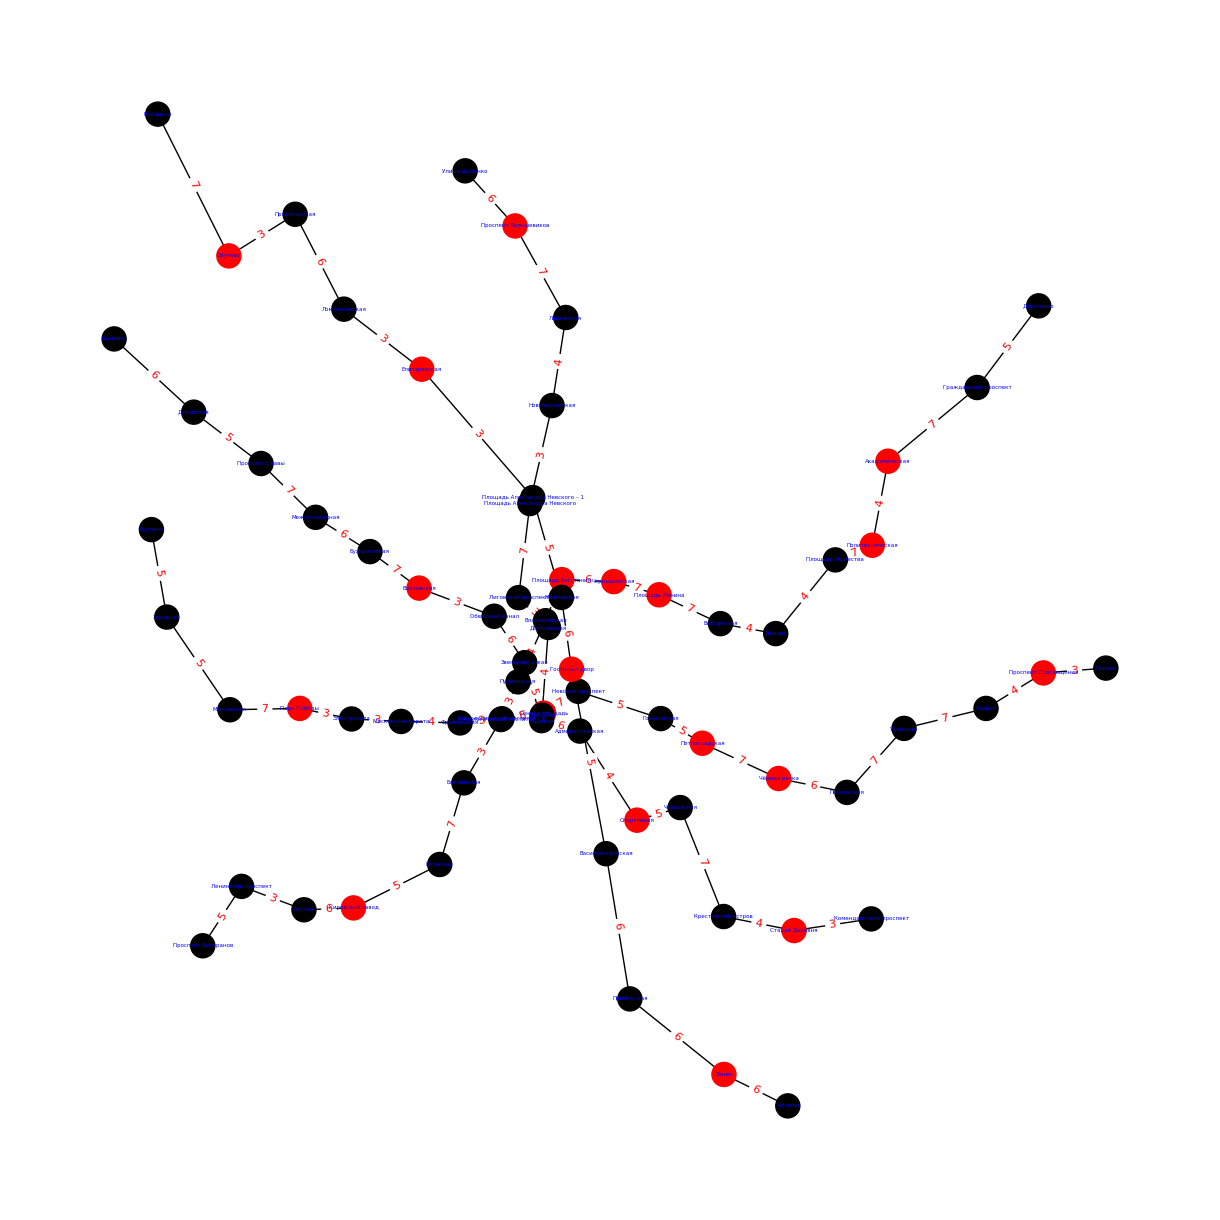

In [185]:
def show_graph(threshold):
    points = find_optimal_points(threshold)
    node_colors = ["red" if node in points else "black" for node in metro_graph.nodes()]
    print(f"Минимальное число торговых точек при условии <={threshold}: {len(points)}")
    result_df.loc[len(result_df)] = {"Порог времени": threshold, "Минимальное кол-во точек": len(points)}
    plt.figure(figsize=(12, 12))

    nx.draw(metro_graph, pos, with_labels=True, font_weight="light", font_color="blue", font_size=4, node_color=node_colors)
    nx.draw_networkx_edge_labels(metro_graph, pos=pos, edge_labels=edge_labels, font_color="red", font_size=8)

    plt.show()

show_graph(25)

#### Для <= 25 мин минимальное кол-во точек = 20

Минимальное число торговых точек при условии <=30: 16


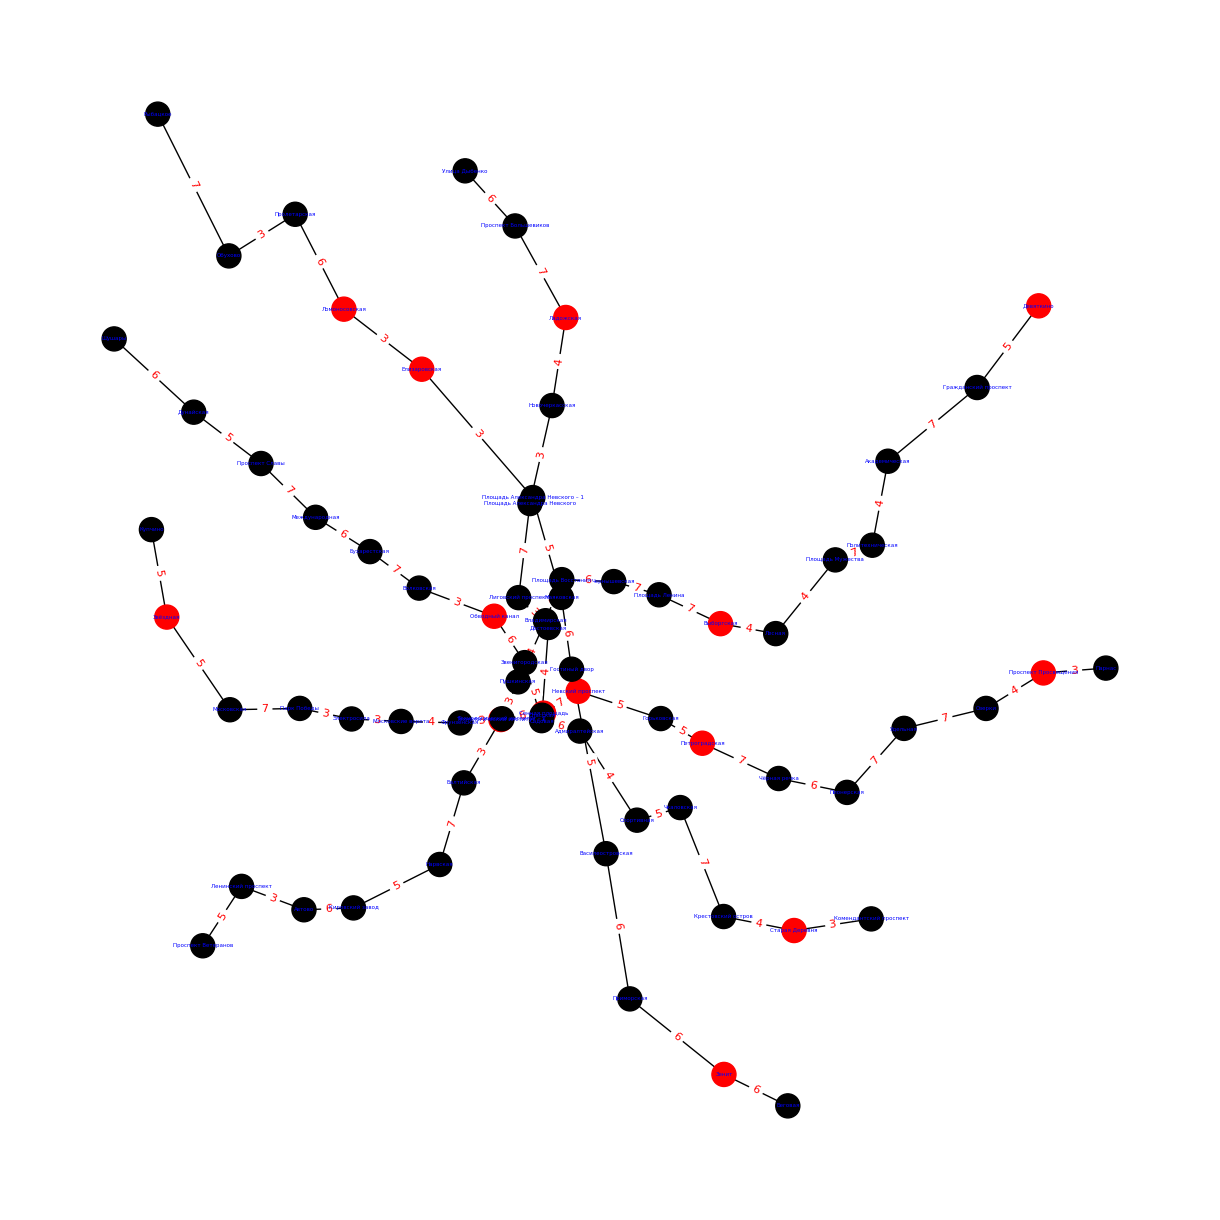

In [186]:
show_graph(30)

#### Для <= 30 мин минимальное кол-во точек = 16

Минимальное число торговых точек при условии <=40: 13


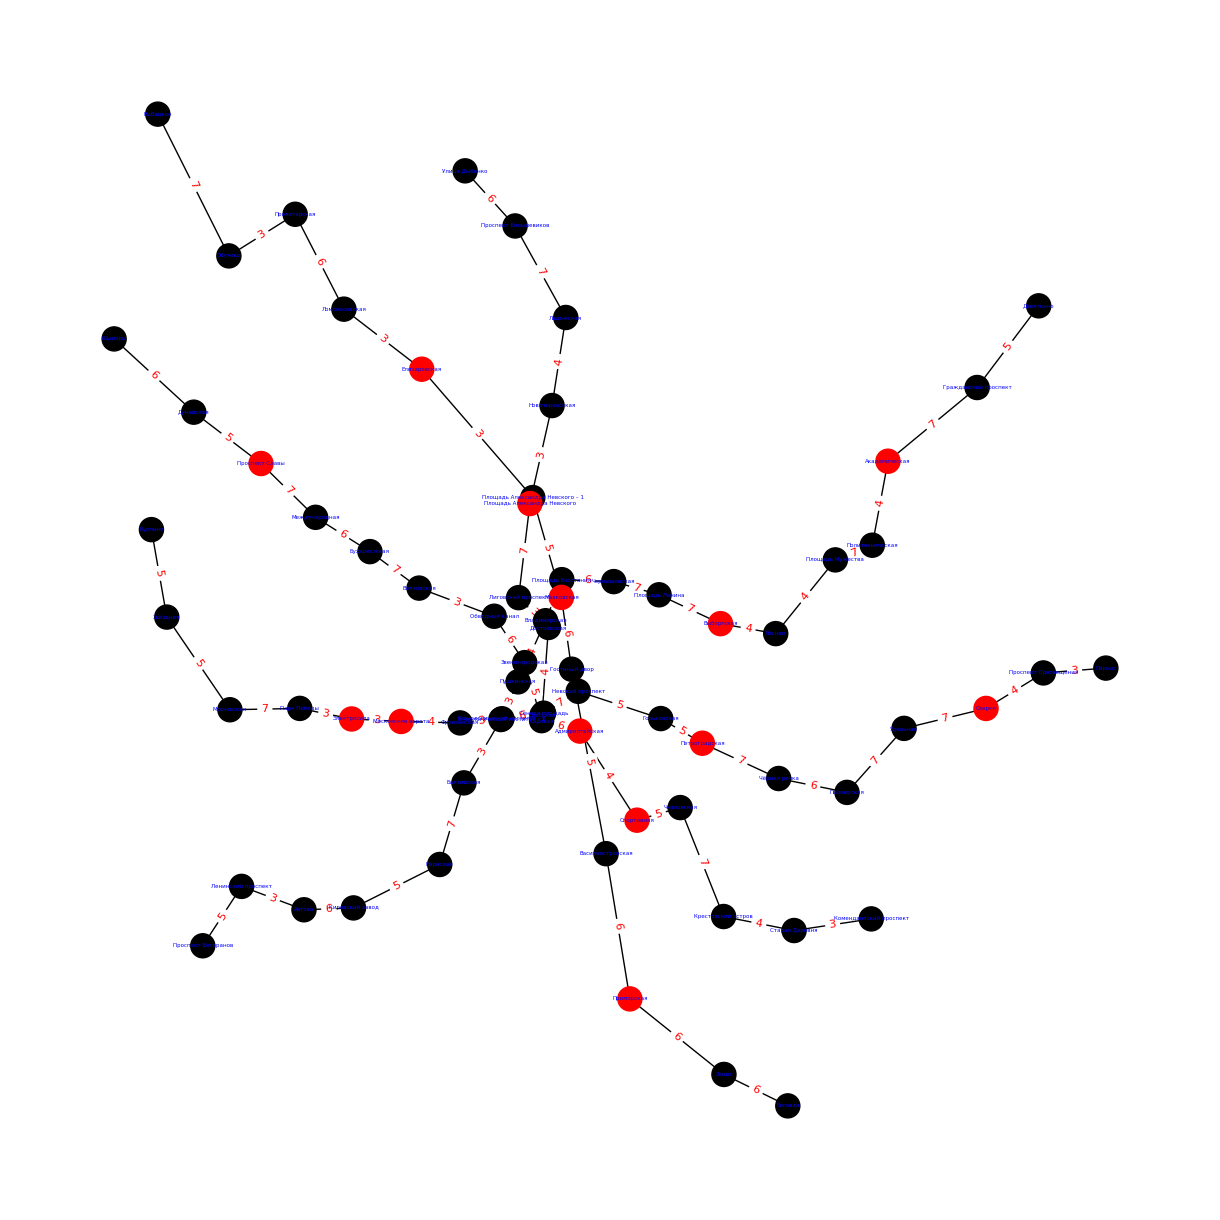

In [187]:
show_graph(40)

#### Для <= 40 мин минимальное кол-во точек = 13

Минимальное число торговых точек при условии <=10: 42


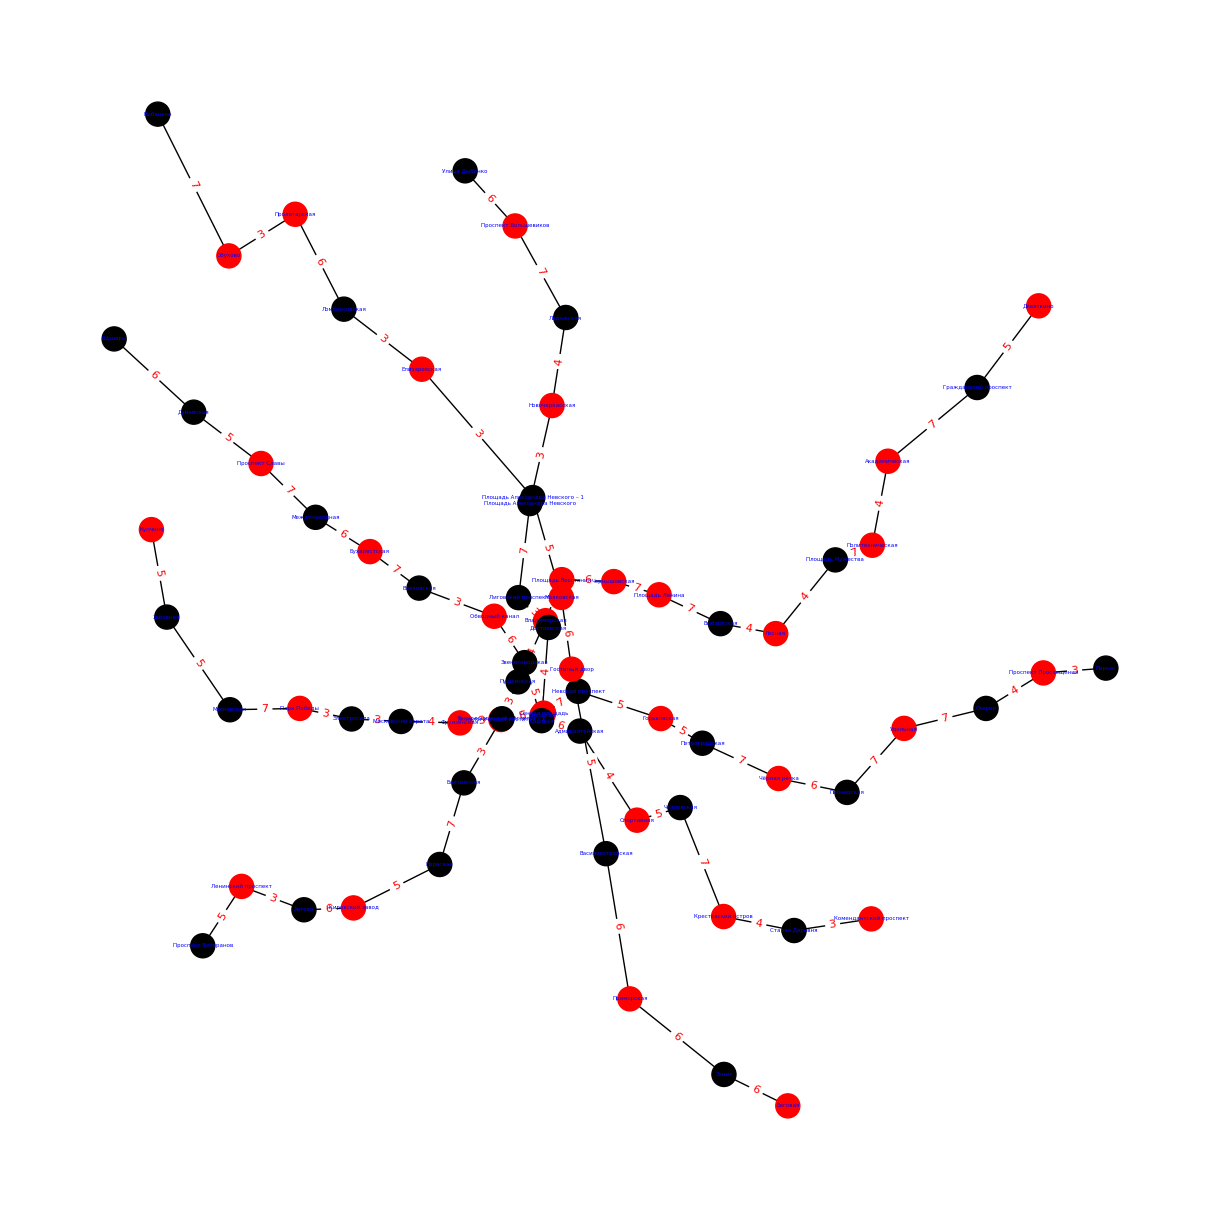

Минимальное число торговых точек при условии <=15: 31


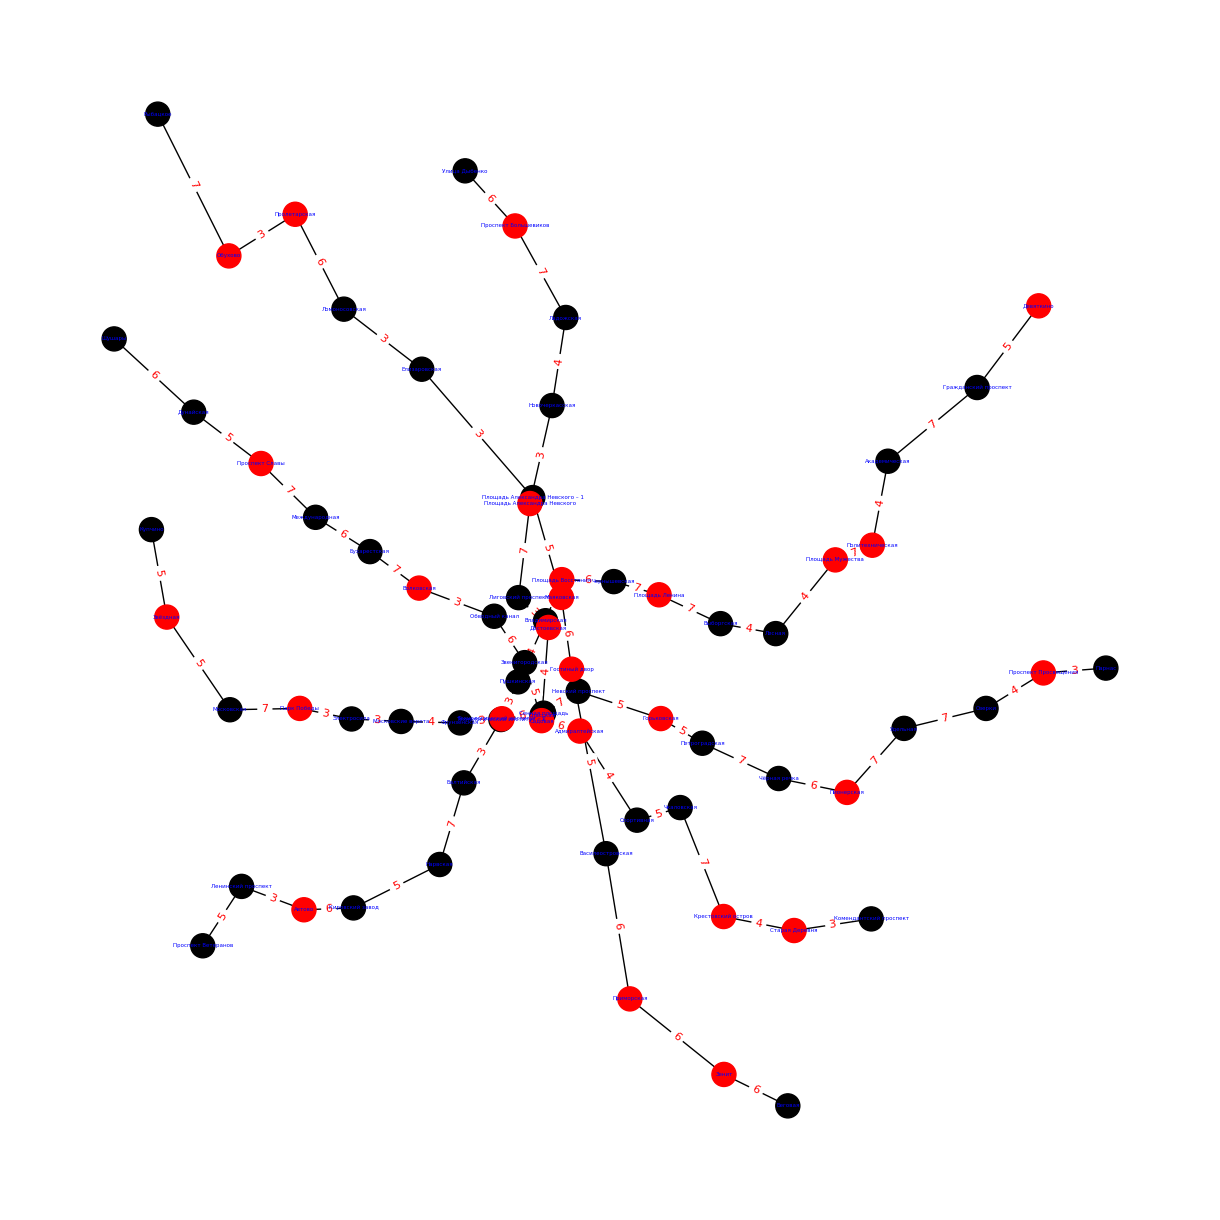

Минимальное число торговых точек при условии <=20: 24


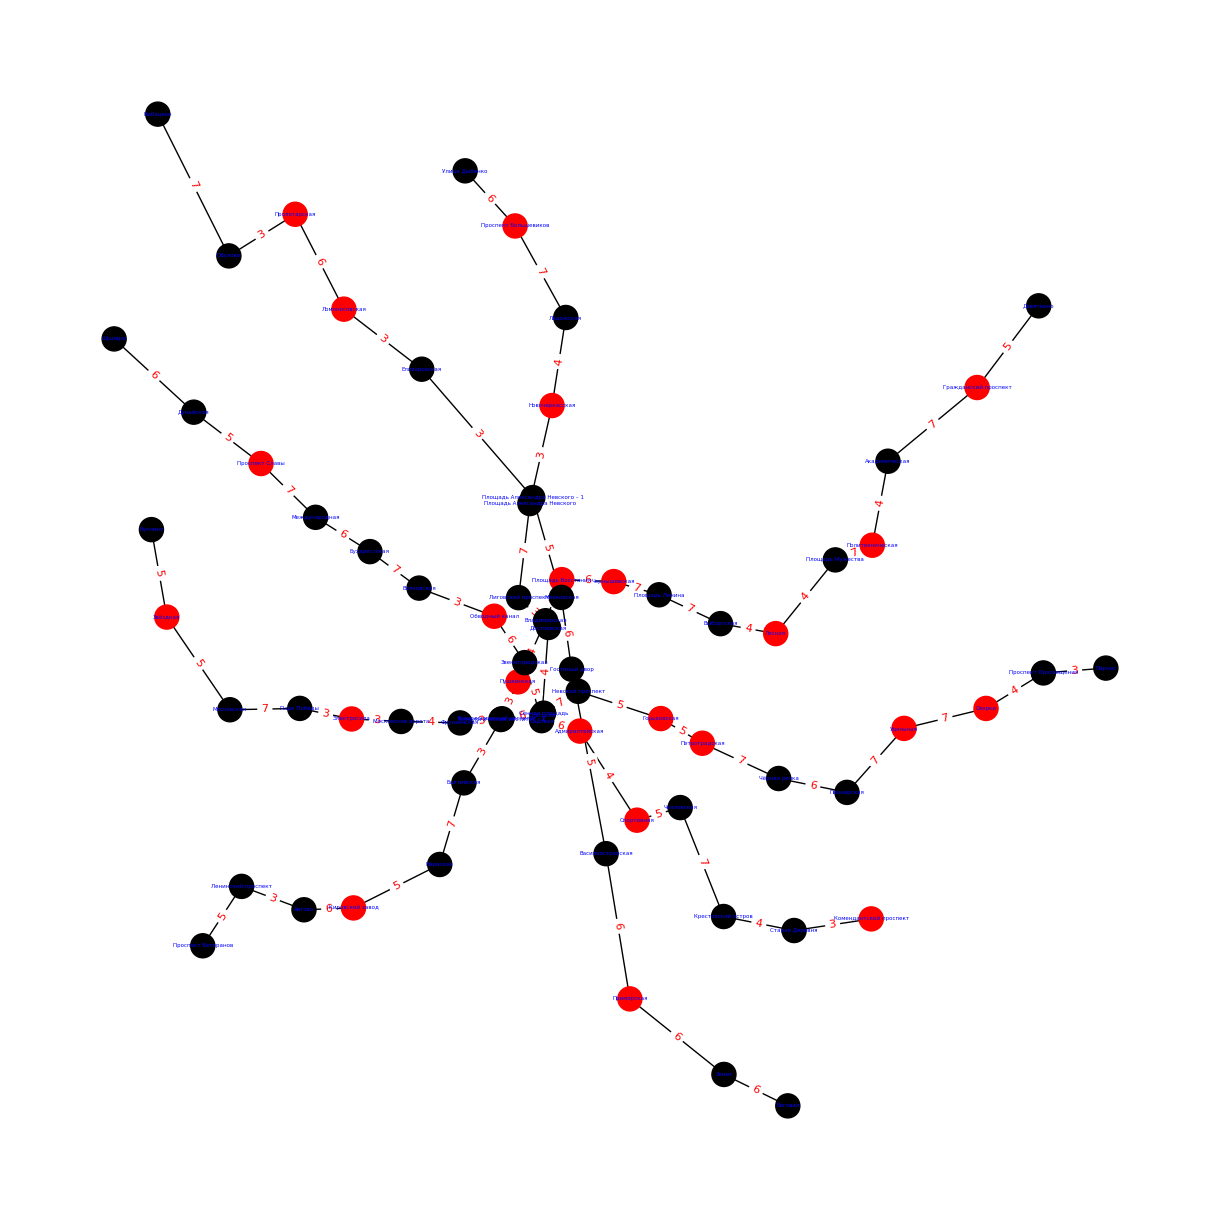

(None, None, None)

In [188]:
show_graph(10), show_graph(15), show_graph(20)

#### 6. Визуализировать проведенный анализ на построенном графе метро

In [189]:
result_df

,Порог времени,Минимальное кол-во точек
0,25,20
1,30,16
2,40,13
3,10,42
4,15,31
5,20,24


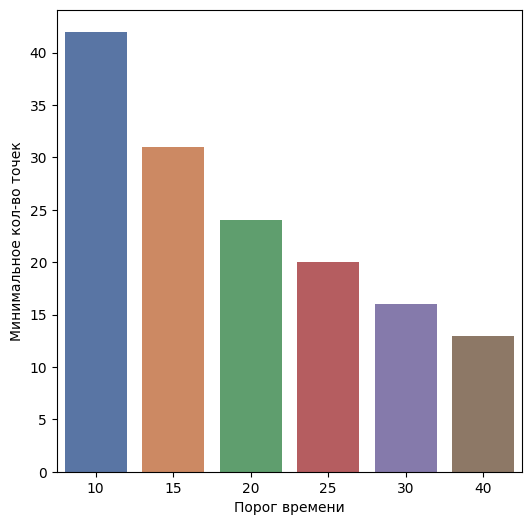

In [191]:
import seaborn as sns

plt.figure(figsize=(6, 6))
# sns.scatterplot(data=result_df, x="th")
sns.barplot(data=result_df, x="Порог времени", y="Минимальное кол-во точек", palette="deep")
plt.show()